In [ ]:
#Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (htps://www.kaggle.com/c/boston-housing (
 #   https:lwww.kaggle.com/clboston-housing). The Boston Housing dataset contains information about various houses in Boston 
#through different parameters. There are 506 samples and 14 feature variables in this dataset. The objective is to predict the value of prices
#of the house using the given features. 
#Import all required Libraries n [72]:

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib. pyplot as plt 
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv ( "HousingData.csv")

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
df_x = pd.read_csv("HousingData.csv" , usecols =["RM","LSTAT"])

In [23]:
 df_y =pd.read_csv("HousingData.csv",usecols =["MEDV" ])

In [25]:
df_x

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,NaN
...,...,...
501,6.593,NaN
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [ ]:
### Checking Null Values

In [27]:
df_x.isnull()


,RM,LSTAT
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
...,...,...
501,False,True
502,False,False
503,False,False
504,False,False


In [29]:
df_x.isnull().sum()
#### BEFORE

RM        0
LSTAT    20
dtype: int64

In [ ]:
##### Data Preprocessing

In [33]:
x_mean = df_x['LSTAT'].mean()
x_mean

12.715432098765433

In [45]:
####  Fill missing Values by mean
df_x.fillna(x_mean, inplace = True)

In [47]:
df_x.isnull().sum()
######## After

RM       0
LSTAT    0
dtype: int64

In [ ]:
###########   CREATING A REGRESSION MODEL

In [39]:
reg = linear_model.LinearRegression()

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.20, random_state=42)

In [43]:
######  TRAINING THE MODEL

In [49]:
reg.fit(x_train,y_train)

LinearRegression()

In [51]:
print(reg.coef_)

[[ 5.78052568 -0.60788826]]


In [53]:
###### Prediction

In [55]:
y_pred = reg.predict(x_test)

In [57]:
y_pred

array([[25.47145546],
       [30.79785955],
       [17.47925688],
       [25.58225762],
       [19.78065255],
       [22.89841085],
       [16.92234966],
       [14.88129779],
       [22.06228513],
       [20.00710209],
       [17.38546329],
       [18.19029953],
       [-2.47859968],
       [22.40180749],
       [19.73754499],
       [26.49741993],
       [17.17594745],
       [ 3.47433942],
       [37.59512416],
       [18.61044977],
       [22.21983093],
       [26.97756344],
       [13.16478113],
       [24.26035649],
       [19.05290414],
       [14.22273242],
       [20.10415853],
       [21.39670002],
       [17.83261539],
       [18.80005391],
       [17.15812313],
       [26.64777512],
       [27.98187867],
       [18.6797099 ],
       [15.61923055],
       [17.28137807],
       [32.96219988],
       [21.84751284],
       [20.02037842],
       [22.24873356],
       [12.1851882 ],
       [28.89233435],
       [38.56893768],
       [18.25791591],
       [25.61705029],
       [16

In [59]:
y_test

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


In [ ]:
### Visualize 

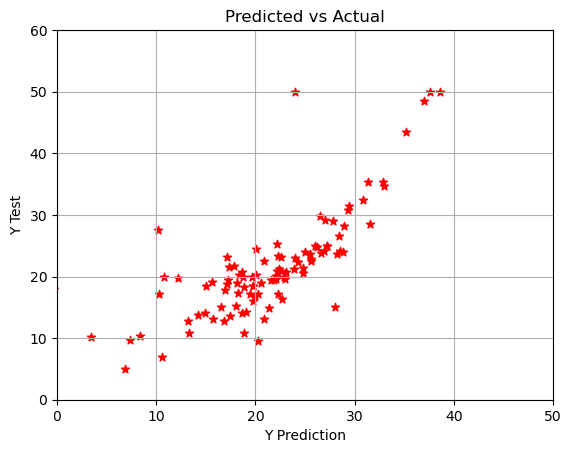

In [81]:
%matplotlib inline 
%matplotlib inline
import matplotlib.pyplot as plt

plt.xlabel("Y Prediction")
plt.ylabel("Y Test")
plt.xlim(0, 50)
plt.ylim(0, 60)  # Changed 'e' to 0 assuming it was a typo
plt.scatter(y_pred, y_test, color="red", marker="*")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

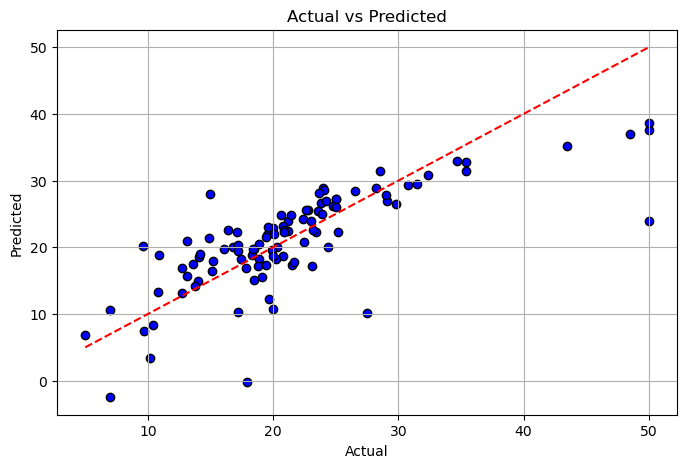

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(x_train, y_train)


import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()



#This code visualizes how well your model's predictions match the actual values. 
#The blue dots show the predicted values versus the actual values, 
#and the red dashed line shows where the predicted values would lie if they were perfect.

#If the blue dots are close to the red line, your model is doing a good job.

#If they are scattered far from the red line, it means the model’s predictions are not accurate.